# Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv(r'C:\Users\mysel\Desktop\Internship\rainfall.csv')
print('No of Rows:',data.shape[0])
print('No of Columns:',data.shape[1])
data.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

In [5]:
data = data.fillna(data.mean())

In [7]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
WindGustDir               991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainTomorrow              239        2.836795
Humidity9am                 0        0.000000
RainToday                   0        0.000000
Temp3pm                     0        0.000000
Temp9am                     0        0.000000
Cloud3pm                    0        0.000000
Cloud9am                    0        0.000000
Pressure3pm                 0        0.000000
Pressure9am                 0        0.000000
Humidity3pm                 0        0.000000
Date                        0        0.000000
WindSpeed3pm                0        0.000000
Location                    0        0.000000
WindGustSpeed               0        0.000000
Sunshine                    0        0.000000
Evaporation                 0        0.000000
Rainfall                    0        0.000000
MaxTemp                     0     

In [8]:
# Data preprocessing
data = data.dropna(subset=['RainTomorrow'])  # Remove rows with missing target values
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})  # Map categorical values to numerical

# Fill missing values with mean
data['RainToday'].fillna(data['RainToday'].mean(), inplace=True)

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target variable
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

# Scale numerical features
numerical_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RainTomorrow classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions for RainTomorrow
y_pred = classifier.predict(X_test)

# Evaluate classifier accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Train the Rainfall regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions for Rainfall
y_pred_reg = regressor.predict(X_test)

# Evaluate regressor using mean squared error
mse = mean_squared_error(y_test, y_pred_reg)
print("Mean Squared Error:", mse)

Accuracy: 0.9010989010989011
Mean Squared Error: 0.07682887667887668


# Balancing using SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

In [20]:
# Splitting data in target and dependent feature
X = data.drop('RainTomorrow', axis=1)
Y = data['RainTomorrow']

# Standard Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5730, 22)
Training target vector size: (5730,)
Test feature matrix size: (2456, 22)
Test target vector size: (2456,)


# Finding best Random state

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8501628664495114 on Random_state 95


# Logistics Regression Model

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=95, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8501628664495114


Confusion matrix of Logistics Regression : 
 [[1779  122]
 [ 246  309]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1901
           1       0.72      0.56      0.63       555

    accuracy                           0.85      2456
   macro avg       0.80      0.75      0.77      2456
weighted avg       0.84      0.85      0.84      2456



# Finding Optimal value of n_neighbors for KNN

In [26]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.38970881972234234
RMSE value for k=  2 is: 0.40957593068531584
RMSE value for k=  3 is: 0.4208530192877891
RMSE value for k=  4 is: 0.4035671561356308
RMSE value for k=  5 is: 0.4015442503837985
RMSE value for k=  6 is: 0.4000203577881395
RMSE value for k=  7 is: 0.38970881972234234
RMSE value for k=  8 is: 0.3886626196610939
RMSE value for k=  9 is: 0.3928307026087092
RMSE value for k=  10 is: 0.39592797028591337
RMSE value for k=  11 is: 0.395413443791362
RMSE value for k=  12 is: 0.4050777059808848
RMSE value for k=  13 is: 0.40052896620435535
RMSE value for k=  14 is: 0.4010369295869249
RMSE value for k=  15 is: 0.4030623815088951
RMSE value for k=  16 is: 0.4010369295869249
RMSE value for k=  17 is: 0.39438237699393675
RMSE value for k=  18 is: 0.39438237699393675
RMSE value for k=  19 is: 0.39438237699393675
RMSE value for k=  20 is: 0.3995111018747447
RMSE value for k=  21 is: 0.3933486075173403
RMSE value for k=  22 is: 0.3969550225180179
RMSE value f

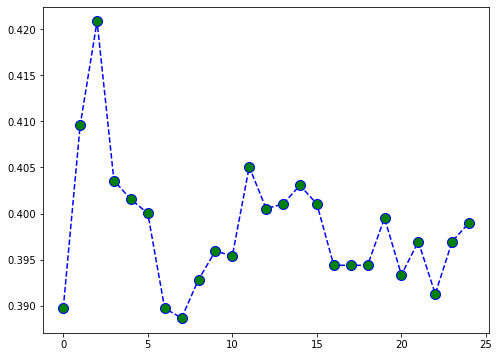

In [27]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8640065146579805


Confusion matrix : 
 [[1818   83]
 [ 251  304]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1901
           1       0.79      0.55      0.65       555

    accuracy                           0.86      2456
   macro avg       0.83      0.75      0.78      2456
weighted avg       0.86      0.86      0.85      2456





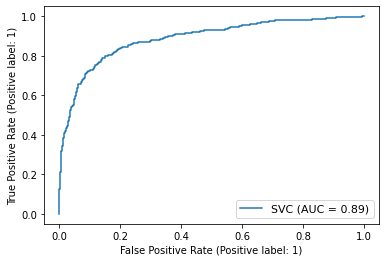

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8163680781758957


Confusion matrix : 
 [[1651  250]
 [ 201  354]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1901
           1       0.59      0.64      0.61       555

    accuracy                           0.82      2456
   macro avg       0.74      0.75      0.75      2456
weighted avg       0.82      0.82      0.82      2456





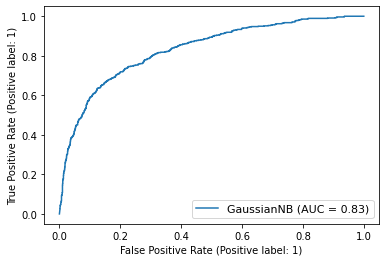

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8367263843648208


Confusion matrix : 
 [[1679  222]
 [ 179  376]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1901
           1       0.63      0.68      0.65       555

    accuracy                           0.84      2456
   macro avg       0.77      0.78      0.77      2456
weighted avg       0.84      0.84      0.84      2456





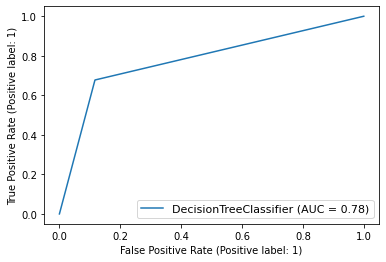

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=8) is


Accuracy Score :
 0.8489413680781759


Confusion matrix : 
 [[1827   74]
 [ 297  258]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1901
           1       0.78      0.46      0.58       555

    accuracy                           0.85      2456
   macro avg       0.82      0.71      0.74      2456
weighted avg       0.84      0.85      0.83      2456





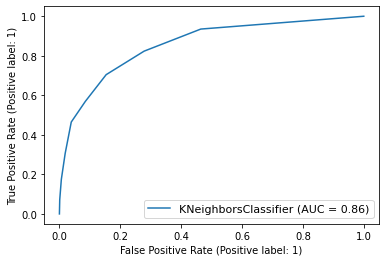

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8973941368078175


Confusion matrix : 
 [[1838   63]
 [ 189  366]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1901
           1       0.85      0.66      0.74       555

    accuracy                           0.90      2456
   macro avg       0.88      0.81      0.84      2456
weighted avg       0.89      0.90      0.89      2456





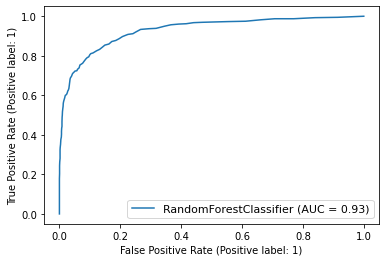

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8921009771986971


Confusion matrix : 
 [[1834   67]
 [ 198  357]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1901
           1       0.84      0.64      0.73       555

    accuracy                           0.89      2456
   macro avg       0.87      0.80      0.83      2456
weighted avg       0.89      0.89      0.89      2456





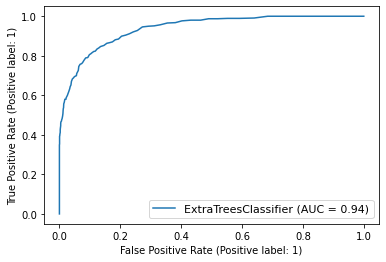

In [28]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 8),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

# CrossValidation :

In [29]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 8),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.85897436 0.79108125 0.79413561 0.82529016 0.85583384]
Mean Score : 0.8250630452829597
Std deviation : 0.029010823548657052




Cross Validation Score SVC() :

Score : [0.85164835 0.8106292  0.79841173 0.80757483 0.84728161]
Mean Score : 0.823109144978418
Std deviation : 0.021935454373389954




Cross Validation Score GaussianNB() :

Score : [0.81746032 0.77092242 0.73060476 0.7806964  0.85155773]
Mean Score : 0.7902483249459424
Std deviation : 0.04128297382078521




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71733822 0.78802688 0.80329872 0.69211973 0.78313989]
Mean Score : 0.7567846868396655
Std deviation : 0.04375341525131914




Cross Validation Score KNeighborsClassifier(n_neighbors=8) :

Score : [0.81318681 0.78802688 0.80574221 0.79596823 0.80024435]
Mean Score : 0.8006336973960675
Std deviation : 0.008538473522400537




Cross Validation Score RandomForestClassifier() :

Score : [0.84676435 0.8454489

We can see that ExtraTreesClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [32]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.800 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.803 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.792 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.792 total time=   0.0s
[CV 5

[CV 5/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.791 total time=   0.0s
[CV 1/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.805 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.803 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.797 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth

[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.845 total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.825 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.841 total time=   0.0s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.820 total time=   0.0s
[CV 1/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 1/5; 17/168] END bootstrap=True, criteri

[CV 2/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.839 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.819 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.838 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.825 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, crite

[CV 1/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.867 total time=   0.0s
[CV 2/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 2/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.854 total time=   0.0s
[CV 3/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 3/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.859 total time=   0.0s
[CV 4/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 4/5; 30/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.835 total time=   0.0s
[CV 5/5; 30/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 30/168] END bootstrap=True, criteri

[CV 2/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.855 total time=   0.0s
[CV 3/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.850 total time=   0.0s
[CV 4/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.857 total time=   0.0s
[CV 1/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 38/168] END bootstrap=True, criteri

[CV 3/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.854 total time=   0.1s
[CV 4/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 4/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.855 total time=   0.0s
[CV 5/5; 44/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 44/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.850 total time=   0.0s
[CV 1/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.863 total time=   0.1s
[CV 2/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 45/168] END bootstrap=True, criteri

[CV 3/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 4/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 4/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.853 total time=   0.0s
[CV 1/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.862 total time=   0.1s
[CV 2/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 52/168] END bootstrap=True, criteri

[CV 3/5; 58/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10;, score=0.856 total time=   0.0s
[CV 4/5; 58/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10
[CV 4/5; 58/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10;, score=0.847 total time=   0.0s
[CV 5/5; 58/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10
[CV 5/5; 58/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=10;, score=0.861 total time=   0.0s
[CV 1/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 1/5; 59/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15;, score=0.874 total time=   0.1s
[CV 2/5; 59/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=15
[CV 2/5; 59/168] END bootstrap=True, criteri

[CV 4/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.862 total time=   0.1s
[CV 5/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.856 total time=   0.0s
[CV 1/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.872 total time=   0.1s
[CV 2/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 66/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.873 total time=   0.1s
[CV 3/5; 66/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15
[CV 3/5; 66/168] END bootstrap=True, criteri

[CV 5/5; 72/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=10;, score=0.843 total time=   0.0s
[CV 1/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 1/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.866 total time=   0.1s
[CV 2/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 2/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.864 total time=   0.2s
[CV 3/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 3/5; 73/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15;, score=0.870 total time=   0.1s
[CV 4/5; 73/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=15
[CV 4/5; 73/168] END bootstrap=True, criteri

[CV 5/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.853 total time=   0.0s
[CV 1/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.863 total time=   0.0s
[CV 2/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.876 total time=   0.1s
[CV 3/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 3/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.869 total time=   0.1s
[CV 4/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 4/5; 80/168] END bootstrap=True, criteri

[CV 1/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.803 total time=   0.0s
[CV 2/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 2/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.812 total time=   0.0s
[CV 3/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 3/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.800 total time=   0.0s
[CV 4/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 4/5; 87/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15;, score=0.808 total time=   0.0s
[CV 5/5; 87/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=15
[CV 5/5; 87/168] END bootstr

[CV 1/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.805 total time=   0.0s
[CV 2/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.807 total time=   0.1s
[CV 3/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.791 total time=   0.1s
[CV 4/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 4/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.798 total time=   0.0s
[CV 5/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 5/5; 94/168] END bootstr

[CV 1/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.831 total time=   0.1s
[CV 2/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 2/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.844 total time=   0.0s
[CV 3/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 3/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.817 total time=   0.0s
[CV 4/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 101/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.840 total time=   0.0s
[CV 5/5; 101/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 101

[CV 5/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.815 total time=   0.0s
[CV 1/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.832 total time=   0.0s
[CV 2/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 2/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.827 total time=   0.1s
[CV 3/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 3/5; 108/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.818 total time=   0.1s
[CV 4/5; 108/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15
[CV 4/5; 108

[CV 4/5; 114/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=0.863 total time=   0.0s
[CV 5/5; 114/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10
[CV 5/5; 114/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=10;, score=0.859 total time=   0.0s
[CV 1/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 1/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.858 total time=   0.1s
[CV 2/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 2/5; 115/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15;, score=0.875 total time=   0.1s
[CV 3/5; 115/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=15
[CV 3/5; 115

[CV 4/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.866 total time=   0.0s
[CV 5/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.851 total time=   0.0s
[CV 1/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.864 total time=   0.1s
[CV 2/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 2/5; 122/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.869 total time=   0.1s
[CV 3/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 3/5; 122

[CV 4/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.853 total time=   0.0s
[CV 5/5; 128/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 128/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=10;, score=0.836 total time=   0.0s
[CV 1/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 129/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15;, score=0.864 total time=   0.1s
[CV 2/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 2/5; 129/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15;, score=0.878 total time=   0.1s
[CV 3/5; 129/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=15
[CV 3/5; 129

[CV 4/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.855 total time=   0.0s
[CV 1/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 136/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.861 total time=   0.1s
[CV 2/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 136/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.871 total time=   0.1s
[CV 3/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 3/5; 136

[CV 4/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5; 142/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 5/5; 142/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.863 total time=   0.0s
[CV 1/5; 143/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15
[CV 1/5; 143/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15;, score=0.867 total time=   0.1s
[CV 2/5; 143/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15
[CV 2/5; 143/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15;, score=0.866 total time=   0.1s
[CV 3/5; 143/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=15
[CV 3/5; 143

[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.858 total time=   0.0s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.856 total time=   0.0s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.850 total time=   0.0s
[CV 1/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 150/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.863 total time=   0.1s
[CV 2/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 150

[CV 2/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 2/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.859 total time=   0.0s
[CV 3/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 3/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.852 total time=   0.1s
[CV 4/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 4/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.870 total time=   0.1s
[CV 5/5; 156/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10
[CV 5/5; 156/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=10;, score=0.854 total time=   0.1s
[CV 1/5; 157

[CV 1/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.867 total time=   0.0s
[CV 2/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 2/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.849 total time=   0.0s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.867 total time=   0.1s
[CV 5/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 163

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [33]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Model

In [34]:
Final_mod = ExtraTreesClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8904723127035831


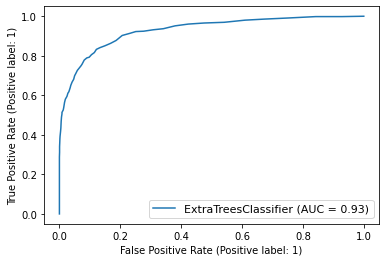

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.7984820696551365


In [35]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [36]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']

In [37]:
# Prediction
prediction = Final_mod.predict(X_test)

# Predicting the Final Model

In [38]:
Actual = np.array(Y_test)
data_Pred = pd.DataFrame()
data_Pred["Predicted Values"] = prediction
data_Pred["Actual Values"] = Actual
data_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
